# 作業重點:
3 層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np

#def nonlin(x,deriv=False): #define sigmoid function
#    if(deriv==True):
#        return x*(1-x)  ##<----這寫錯 除非用遞回寫法
#    return 1/(1+np.exp(-x))

def sigmoid(x):
    return 1/(1+np.exp(-x))
def D_sigmoid(x): # 另外自己寫一個sigmoid的微分含樹
    return sigmoid(x)*(1-sigmoid(x))


In [2]:
y = np.array([[0,0,1,1]]).T
y

array([[0],
       [0],
       [1],
       [1]])

In [3]:
## given x and y and initial weight

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define output dataset 
y = np.array([[0,0,1,1]]).T

np.random.seed(1)
syn0 = 2*np.random.random((3,1)) - 1

##-->建構一個 3d input 然後直接 output的網路

In [5]:
## forward and backwordprobgation

sse_error_hist = [] ##用來記錄 error變化
for iter in range(10000): #跑個10000個batch update
    # forward propagation
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))

    ### 原範例
    #l1_error = y - l1
    #l1_delta = l1_error * nonlin(l1,True)
    # update weights
    #syn0 += np.dot(l0.T,l1_delta)
    
    ### from chibao
    sse = np.sum(0.5*(y-l1)**2)
    
    l1_delta = np.dot( l0.T , -1*(y-l1)*D_sigmoid(np.dot(l0,syn0))  ) #<-error對 syn0微分後的值
    syn0 -= l1_delta #gradient descend update
    sse_error_hist.append(sse)
    
print("Output After Training:\n")
print(l1)


Output After Training:

[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


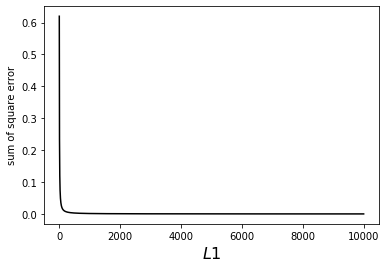

In [6]:
#把 error history 畫出來看看是否train過頭˙
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果
plt.plot(sse_error_hist, ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.ylabel('sum of square error')
plt.show()

##-->可以發現其實可以很早就停了

## HW多加一層hidden layer

In [7]:
##  x and y 一樣，initial weight數量部一樣
np.random.seed(1)
syn0 = 2*np.random.random((3,50)) - 1 # 多加一層 hidden layer 共50顆
syn1 = 2*np.random.random((50,1)) - 1

##-->建構一個input 3d 中間一層50顆的hidden layer 最後output 1d 的網路

In [8]:
sse_error_hist = []
for iter in range(10000):
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0)) 
    l2 = sigmoid(np.dot(l1,syn1))


    sse = np.sum(0.5*(y-l2)**2)
    
    l2_delta =  np.dot( l1.T , -1*(y-l2)*D_sigmoid(np.dot(l1,syn1))  )  ##<-error對 syn1微分後的值
    l1_delta = np.dot( l0.T , -1*(y-l2)*D_sigmoid(np.dot(l1,syn1))*D_sigmoid(np.dot(l0,syn0))  ) ##<-error對 syn0微分後的值
    
    syn1 -= l2_delta #gradient descend update
    syn0 -= l1_delta #gradient descend update
    
    sse_error_hist.append(sse)

print("Output After Training:\n")
print(l2)

Output After Training:

[[0.45206241]
 [0.49858314]
 [0.97825447]
 [0.97403342]]


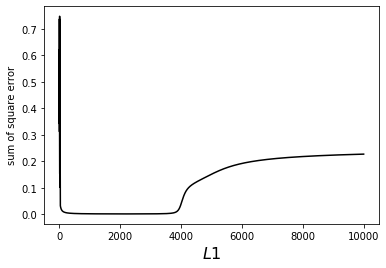

In [9]:
#把 error history 畫出來看看是否train過頭˙
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果
plt.plot(sse_error_hist, ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.ylabel('sum of square error')
plt.show()

##-->發現到1000就收斂 到4000以上開始爛掉 所以應該訓練到1000就可停了

In [11]:
##於是乎 重train 一次只迭代1000次

np.random.seed(1)
syn0 = 2*np.random.random((3,50)) - 1 
syn1 = 2*np.random.random((50,1)) - 1

sse_error_hist = []
for iter in range(1000):
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0)) 
    l2 = sigmoid(np.dot(l1,syn1))


    sse = np.sum(0.5*(y-l2)**2)
    
    l2_delta =  np.dot( l1.T , -1*(y-l2)*D_sigmoid(np.dot(l1,syn1))  )  ##<-error對 syn1微分後的值
    l1_delta = np.dot( l0.T , -1*(y-l2)*D_sigmoid(np.dot(l1,syn1))*D_sigmoid(np.dot(l0,syn0))  ) ##<-error對 syn0微分後的值
    
    syn1 -= l2_delta #gradient descend update
    syn0 -= l1_delta #gradient descend update
    
    sse_error_hist.append(sse)

print("Output After Training:\n")
print(l2)

Output After Training:

[[0.0326807 ]
 [0.02952227]
 [0.97842632]
 [0.97747383]]


### 可以發現 多加一層並沒有什麼改善(但原本就已經很好了) 反而增加overfitting的風險 。  sigmoid output 應該使用logitstic loss 而非mse loss 且可加入learning rate 以及換其他種optimization method(e.g.adam)試試